In [117]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use("seaborn-whitegrid")

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

In [118]:
%matplotlib inline

In [119]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
example_submission = pd.read_csv("data/gender_submission.csv")

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


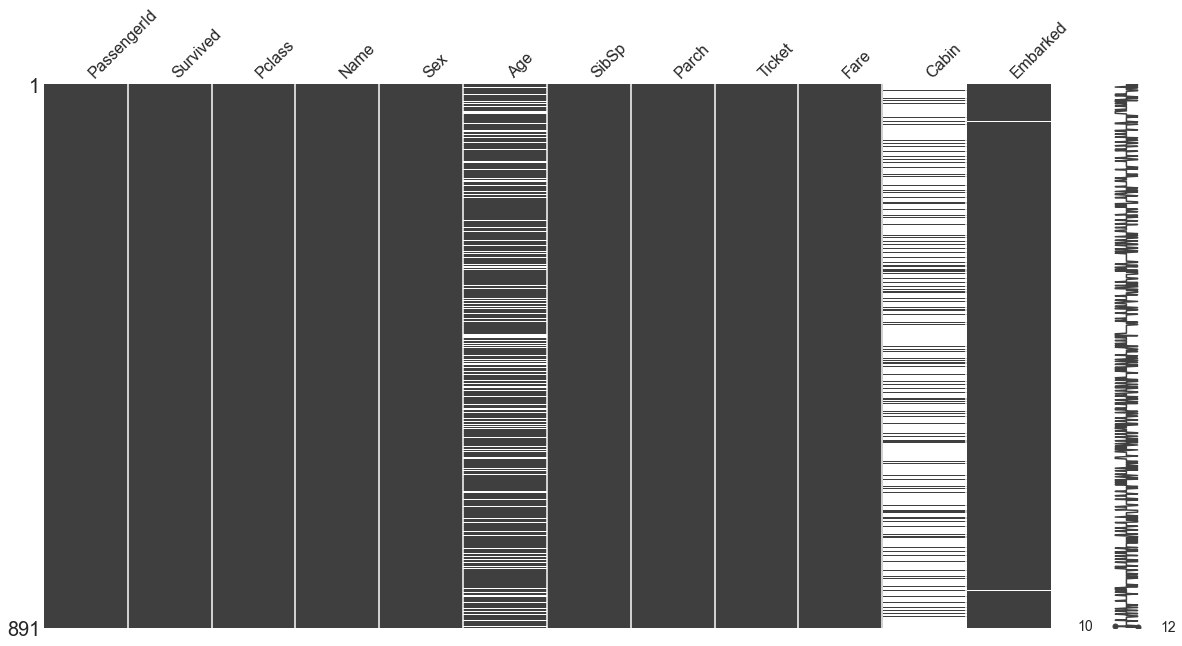

In [121]:
missingno.matrix(train, figsize=(20,10))

In [122]:
def find_missing_values(df, columns):
    missing_vals = {}
    print("Number of missing or NaN values for each column: ")
    df_length = len(df)
    for column in columns:
        total_col_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_col_values
    return missing_vals

missing = find_missing_values(train, train.columns)
print(missing)

Number of missing or NaN values for each column: 
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [135]:
# Create subset dataframes for different types of data
df_con = pd.DataFrame()
df_bin = pd.DataFrame()

In [161]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

# FEATURE ENGINEERING

0    549
1    342
Name: Survived, dtype: int64


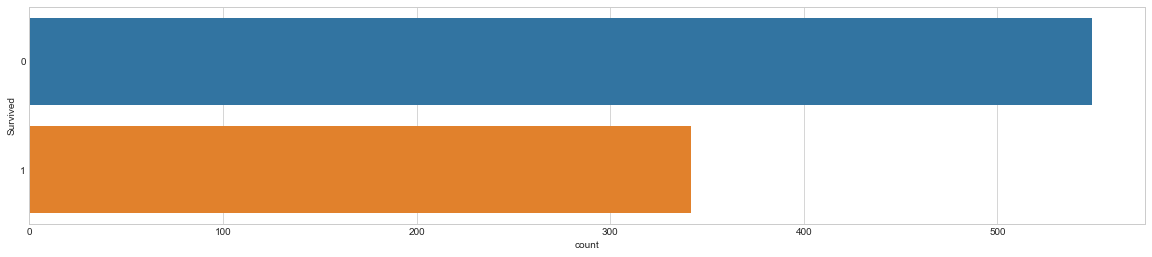

In [156]:
# Survived -- TARGET --
# How many passengers actually survived?
plt.figure(figsize=(20,4))
sns.countplot(y="Survived", data=train)
print(train.Survived.value_counts())

In [138]:
# Add the target to the subset dataframes
df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train["Survived"]

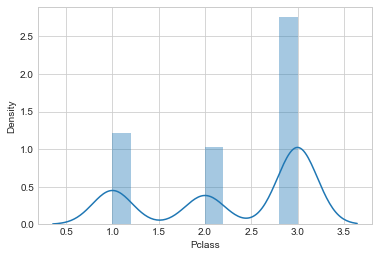

In [139]:
# Pclass
# Check the distribution of the data
sns.distplot(train.Pclass)

In [140]:
missing["Pclass"]

0

In [141]:
# No missing values and clearly categorical data, so I will add it to my df_bin.
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train["Pclass"]

In [142]:
# Name
# Not going to be useful for making predictions, as everyone's name is unique. However, I am going to make
# new feature by taking each persons Title and see if that helps with categorisation.
train["Title"] = train.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

male      577
female    314
Name: Sex, dtype: int64


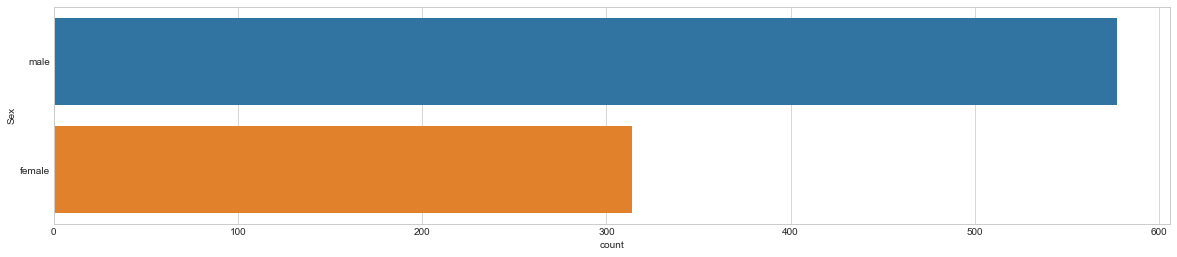

In [157]:
# Sex
plt.figure(figsize=(20,4))
sns.countplot(y="Sex", data=train)
print(train.Sex.value_counts())

In [158]:
# A pivot table to show the likelihood of surviving or not based on gender. As you can see, far more males
# died than females.
pd.pivot_table(train, index="Survived", columns="Sex", values="Ticket", aggfunc="count")

Sex,female,male
Survived,,
0,81,468
1,233,109


In [160]:
missing["Sex"]

0

In [153]:
# Age

In [ ]:
# SibSp

In [ ]:
# Balancing the data

# Since the data is unbalanced and I have lots of missing values in the Age column, I have decided
# to just drop all people who did not Survive where I also don't have a value for their Age.

to_drop = train[(train.Survived == 0) & (train.Age.isnull())]
train = train.drop(to_drop.index)